### 청와대 국민청원 데이터에서 각 분류별 Top1 추출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#출력 그림 크기 조절
sns.set(rc={'figure.figsize':(12,12)})
plt.style.use('ggplot')
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import warnings
warnings.filterwarnings("ignore")
import datetime as dt
### 세종사전 실행
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
twitter = Twitter()

In [2]:
df = pd.read_excel("test/test_안전.xlsx")
df
# df.Date = pd.to_datetime(df.Date)

,Date,Title
0,2020-05-18,형제복지원 진상규명 탄력받을까? 여야 '과거사법' 처리 합의
1,2020-05-18,‘디지털 성범죄’ 양형기준 설정 연기
2,2020-05-18,"'갓갓' 문형욱, 담담한 목소리로 ""성폭행 3건 지시"""
3,2020-05-18,결국 빠진 ‘피해자 배상’ 과거사법 갈등 피해 간 20대 국회
4,2020-05-18,"'갓갓' 문형욱 ""잘못된 성 관념 가지고 있었다"""
...,...,...
10682,2020-02-16,국민청원 국민청원
10683,2020-02-16,이 땅의 불의와 적폐와 맞써 싸우는 어린 순수의 국민청원
10684,2020-02-16,국민청원 국민청원
10685,2020-02-16,아이즈원 뮤직뱅크 찬성 반대 논란 이ㅅ 핫이슈 장도...


## 키워드 변경 함수

In [3]:
def rep_keyword(before, after):
    ind = df.loc[df['Title'].str.contains(before)].loc[:,"Title"].index
    df.iloc[ind,1] = df.loc[df['Title'].str.contains(before)].loc[:,"Title"].str.replace(before,after,case = False)

In [4]:
rep_keyword("n번방","엔번방")
rep_keyword("N번방","엔번방")

In [5]:
from string import punctuation
df2 = list(df.Title)

In [6]:
def strip_punc(s):
    return ''.join(c for c in s if c not in punctuation)

clean_title = []
for sent in df2:
    clean_df = strip_punc(sent)
    clean_title.append(clean_df)

clean_title[0:3]

['형제복지원 진상규명 탄력받을까 여야 과거사법 처리 합의',
 '‘디지털 성범죄’ 양형기준 설정 연기',
 '갓갓 문형욱 담담한 목소리로 성폭행 3건 지시']

In [7]:
from konlpy.tag import Kkma
kkma = Kkma()
import re
import time
import datetime
start = time.time()

dataset = []
for i in range(len(clean_title)):
    dataset.append(kkma.nouns(re.sub('[^가-힣a-zA-Z\s]','',clean_title[i])))
    
sec = time.time() - start
times = str(datetime.timedelta(seconds = sec)).split(".")
times = times[0]
print(times)

0:03:45


In [8]:
from gensim import corpora, models
import gensim

In [9]:
high_score_reviews = dataset

In [10]:
high_score_reviews = [[y for y in x if not len(y)==1]
                     for x in high_score_reviews]
diction = corpora.Dictionary(high_score_reviews)
corpus = [diction.doc2bow(text) for text in high_score_reviews]


In [11]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values = []
for i in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics= i, id2word= diction)
    coherence_model_lda = CoherenceModel(model = ldamodel, texts = high_score_reviews, dictionary = diction,
                                        topn = 10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)


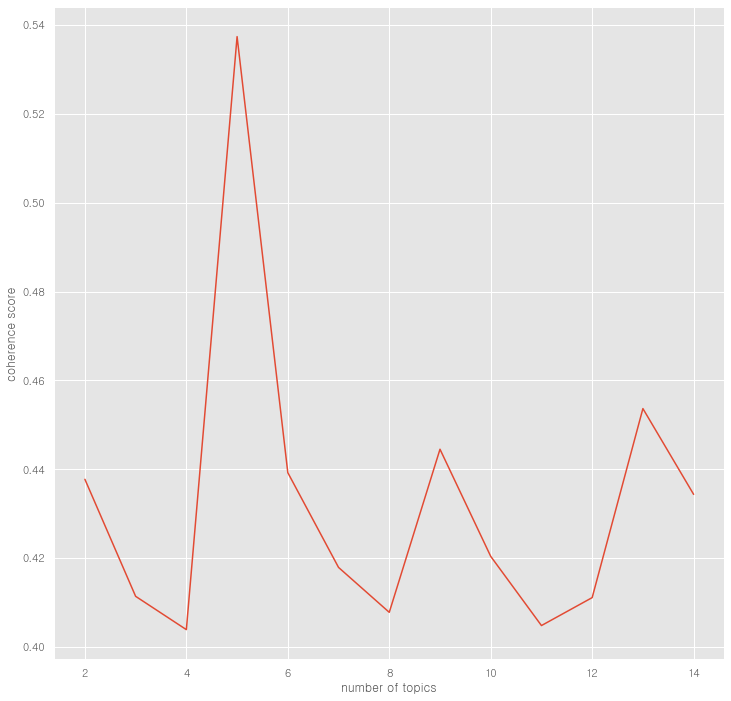

In [12]:
x = range(2,15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [13]:
import matplotlib.pyplot as plt
perplexity_values = []
for i in range(2, 20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics= i, id2word= diction)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

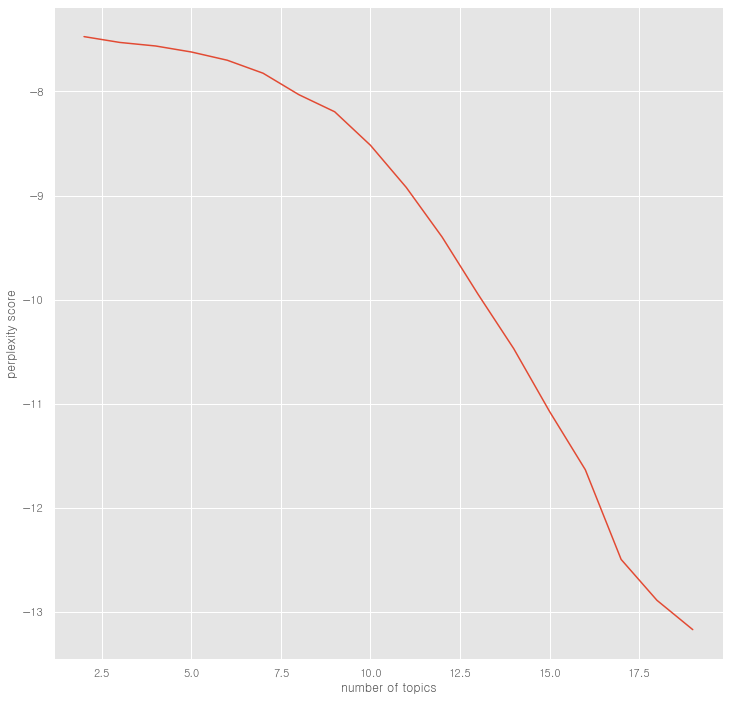

In [14]:
x = range(2,20)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show()

In [43]:
## 토픽 개수 7개 아니면 11개가 적당할거 같다.
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics= 13, alpha = 0.1, id2word= diction)

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
ldamodel.print_topics(num_words = 20)

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.152*"대한" + 0.147*"민국" + 0.147*"대한민국" + 0.024*"교주" + 0.023*"대통령" + 0.015*"미국" + 0.010*"보장" + 0.010*"수사" + 0.007*"대응" + 0.007*"수색" + 0.007*"집단" + 0.006*"누구" + 0.006*"학교" + 0.006*"책임" + 0.006*"압수" + 0.006*"압수수색" + 0.005*"구속" + 0.005*"대처" + 0.005*"회원" + 0.004*"민원"'),
 (1,
  '0.224*"해체" + 0.052*"예술" + 0.046*"현재" + 0.042*"경북" + 0.021*"사람" + 0.019*"요청" + 0.012*"국민청원" + 0.012*"국민" + 0.011*"강제" + 0.011*"어린이" + 0.009*"하다" + 0.009*"청원" + 0.008*"채널" + 0.007*"내가" + 0.007*"공무원" + 0.006*"대구" + 0.006*"만명" + 0.005*"자신" + 0.005*"라인" + 0.005*"명의"'),
 (2,
  '0.120*"입국" + 0.081*"동의" + 0.049*"세계" + 0.022*"국민" + 0.016*"시간" + 0.013*"가능" + 0.013*"방역" + 0.010*"공개" + 0.009*"거부" + 0.008*"댓글" + 0.008*"격리" + 0.007*"양성" + 0.007*"검사" + 0.007*"클릭" + 0.007*"팩트" + 0.007*"국가" + 0.007*"주변" + 0.006*"처음" + 0.006*"친구" + 0.006*"청원"'),
 (3,
  '0.123*"촉구" + 0.080*"청와대" + 0.037*"대구" + 0.020*"개정" + 0.018*"발언" + 0.017*"국회의원" + 0.015*"분노" + 0.013*"이동" + 0.013*"문화" + 0.012*"오전" + 0.010*"시장" + 0.010*"세력" + 0.009*"주민" + 0.00

In [45]:
import pyLDAvis

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
from gensim.models import LdaModel # To use the LDA model

import pyLDAvis.gensim # To visualise LDA model effectively

import pandas as pd


pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, diction)
vis

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.391694 -0.034344       1        1  26.999753
8      0.324519 -0.022002       2        1  16.036051
7     -0.040932 -0.091530       3        1   7.424276
6     -0.023639  0.272768       4        1   6.005757
5     -0.045550 -0.130160       5        1   5.951056
2     -0.048675 -0.041552       6        1   5.949259
3     -0.133389 -0.067126       7        1   5.643785
0     -0.101099  0.045187       8        1   5.265382
9      0.014133  0.227507       9        1   4.950215
1     -0.023814 -0.079676      10        1   4.742658
11    -0.071285 -0.071022      11        1   4.508093
12    -0.114868 -0.019797      12        1   3.468977
4     -0.127092  0.011746      13        1   3.054739, topic_info=      Term         Freq        Total Category  logprob  loglift
3229  국민청원  9036.000000  9036.000000  Default  30.0000  30.0000
2403   청와대  2941.000000  2941.000000  Default  29.0000  29.0000
1045    국민  9930.000000  9930.000000  Default  28.0000  28.0000
2069    해체  1439.000000  1439.000000  Default  27.0000  27.0000
1090    청원  9889.000000  9889.000000  Default  26.0000  26.0000
...    ...          ...          ...      ...      ...      ...
581     하나    25.754857   106.750184  Topic13  -5.0807   2.0666
2475    등장    24.515837   125.506928  Topic13  -5.1300   1.8554
1046    분노    24.000533   226.177770  Topic13  -5.1512   1.2452
135    코로나    24.688721  1646.531177  Topic13  -5.1230  -0.7116
1090    청원    21.018495  9889.297972  Topic13  -5.2839  -2.6653

[669 rows x 6 columns], token_table=      Topic      Freq Term
term                      
716       3  0.154363   가능
716       4  0.015969   가능
716       5  0.042583   가능
716       6  0.558900   가능
716       8  0.026614   가능
...     ...       ...  ...
803      11  0.109093   회원
803      12  0.036364   회원
965      13  0.951747   효과
3485     11  0.873750   후회
2262      9  0.947194   희망

[1415 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 9, 8, 7, 6, 3, 4, 1, 10, 2, 12, 13, 5])

In [47]:
kk = ldamodel.show_topic(1,topn = 80000)
type(ldamodel.show_topic)
kk2 = pd.DataFrame(kk)
kk2
#kk2.to_csv("test0911_1.csv",encoding = "cp949", index = False)

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1
0,해체,0.223648
1,예술,0.052087
2,현재,0.045590
3,경북,0.042166
4,사람,0.021197
...,...,...
13583,저세상,0.000014
13584,이발,0.000014
13585,가보,0.000014
13586,가야하나,0.000014


In [48]:
def make_topictable_per_doc(ldamodel,corpus):
    topic_table = pd.DataFrame()
    
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list
        doc = sorted(doc, key = lambda x: (x[1]), reverse = True)
        
        
        
        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0:
                topic_table = topic_table.append(pd.Series([int(topic_num),round(prop_topic,4),topic_list]),
                                                ignore_index= True)
            else:
                break
                    
    return(topic_table)

                

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
topictable = make_topictable_per_doc(ldamodel,corpus)
topictable = topictable.reset_index()
topictable.columns = ["문서 번호", "가장 비중이 높은 토픽", "가장 높은 토픽의 비중", "각 토픽의 비중"]
topictable["문서 내용"] = df.Title
topictable = topictable.loc[:,["문서 번호", "문서 내용", "가장 비중이 높은 토픽", "가장 높은 토픽의 비중", "각 토픽의 비중"]]
topictable[:10]

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,문서 번호,문서 내용,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,형제복지원 진상규명 탄력받을까? 여야 '과거사법' 처리 합의,3.0,0.9137,"[(3, 0.9136933)]"
1,1,‘디지털 성범죄’ 양형기준 설정 연기,6.0,0.8515,"[(0, 0.012375514), (1, 0.012375455), (2, 0.012..."
2,2,"'갓갓' 문형욱, 담담한 목소리로 ""성폭행 3건 지시""",1.0,0.7735,"[(0, 0.018873347), (1, 0.77350885), (2, 0.0188..."
3,3,결국 빠진 ‘피해자 배상’ 과거사법 갈등 피해 간 20대 국회,4.0,0.4722,"[(4, 0.4721689), (9, 0.11311585), (10, 0.17102..."
4,4,"'갓갓' 문형욱 ""잘못된 성 관념 가지고 있었다""",2.0,0.5150,"[(0, 0.023271073), (1, 0.023273189), (2, 0.515..."
5,5,"‘갓갓’ 문형욱, 검찰 송치 “잘못된 성 관념, 죄송”",2.0,0.6900,"[(0, 0.015879791), (1, 0.015881794), (2, 0.689..."
6,6,얼굴 공개 ‘갓갓’ 檢 송치 “잘못된 성 관념 조주빈과는 모르는 사이”,2.0,0.6797,"[(2, 0.67968816), (7, 0.11935735), (12, 0.1038..."
7,7,"엔번방 처음 만든 '갓갓' 얼굴 공개 ""피해자들에 죄송""",7.0,0.8095,"[(0, 0.015874343), (1, 0.015874483), (2, 0.015..."
8,8,"‘갓갓’ 문형욱, 검찰 송치 “잘못된 성 관념, 죄송”",2.0,0.6901,"[(0, 0.015879793), (1, 0.015881794), (2, 0.690..."
9,9,황교안엔 물병 던진 '5월 광주' 사과한 주호영은 덕담 들었다,1.0,0.7306,"[(0, 0.013131402), (1, 0.7305896), (2, 0.01313..."


In [22]:
# topictable.to_csv("test0911_2.csv",encoding = "cp949", index = False)

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
